In [1]:
import pandas as pd
import numpy as np
import verispy, os
from verispy import VERIS

[Source for VERISPY + Useful README](https://github.com/RiskLens/verispy)

In [43]:


DATA_DIR ="./data/validated/"
PKL_PATH = "./data/vdf.pkl"

v = VERIS(json_dir=DATA_DIR, verbose=True)

# json_to_df is an expensive function, so we save the converted dataframe for use between sessions. 
if not os.path.exists(PKL_PATH):
    print("we're making pickles")
    vdf = v.json_to_df()
    vdf.to_pickle(PKL_PATH)
vdf = pd.read_pickle(PKL_PATH)
# v.raw_df=vdf
print(vdf.shape)

v.enum_summary(vdf, "action")
v.enum_summary(vdf, "attribute.confidentiality.data_total")

#df_action = vdf.loc[:, vdf.columns.str.startswith('plus')]
#df_action.columns
#v.enum_summary(vdf, ["plus"])

Found 8323 json files.
(8323, 2347)


,enum,x,n,freq
0,1.0,878,8323,0.10549
1,2.0,97,8323,0.01165
2,1000.0,57,8323,0.00685
3,3.0,50,8323,0.00601
4,2000.0,40,8323,0.00481
...,...,...,...,...
1727,2089.0,1,8323,0.00012
1728,2080.0,1,8323,0.00012
1729,2076.0,1,8323,0.00012
1730,2075.0,1,8323,0.00012


##### v is a VERIS object. vdf contains the actual data. 

[Good StackOverflow Answer on working with Dataframes vvv](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

In [42]:
df_impact = vdf.loc[:, vdf.columns.str.contains('rating')]
print(v.enum_summary(vdf, 'impact.overall_rating'))
print(v.enum_summary(vdf, "impact.loss.rating"))

#v.enum_summary(vdf, "impact.rating")

            enum     x      n     freq
0  Insignificant    52  116.0  0.44828
1    Distracting    25  116.0  0.21552
2       Damaging    20  116.0  0.17241
3        Painful    18  116.0  0.15517
4   Catastrophic     1  116.0  0.00862
5        Unknown  5767    NaN      NaN
Empty DataFrame
Columns: [enum, x, n, freq]
Index: []


In [4]:
df_action = vdf.loc[:, vdf.columns.str.startswith('action')]


In [5]:
df_final = df_action.iloc[:, :7]

In [6]:
df_bugs = vdf[vdf['action.Hacking'] | vdf['action.Malware']]
# print(df_bugs.shape)



In [7]:
indices = list(df_bugs.index)
bugs = [False] * df_final.shape[0]
for i in indices:
    bugs[i] = True

In [8]:
df_final['action.Bugs'] = bugs
df_final

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,True
4,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8318,False,True,False,False,False,False,False,False
8319,False,False,False,False,True,False,False,False
8320,False,False,False,False,True,False,False,False
8321,False,False,False,False,False,True,False,False


In [9]:
#Creates a smaller table for ease of running
N = 1000
sample = np.random.choice(8323, N)
df_short = df_final.iloc[sample,:].reset_index().iloc[:,1:]


# Maybe we should id the column here in the future so we can refer to the original table values

In [10]:
impactful_df = vdf[vdf['impact.overall_rating.Insignificant'] | vdf['impact.overall_rating.Distracting'] | vdf['impact.overall_rating.Painful'] | vdf['impact.overall_rating.Catastrophic'] | vdf['impact.overall_rating.Damaging']].reindex()
reset_impactful_df = impactful_df.reset_index(drop=True) #Resets the indicies
impactful_df_bugs = reset_impactful_df[reset_impactful_df['action.Hacking'] | reset_impactful_df['action.Malware']]
impactful_df_bugs


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.XPF,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
1,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA,Uber
5,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-MI,Adrian College
6,False,False,True,False,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-IA,Virginia Gay Hospital
7,False,False,False,True,False,False,False,False,NaN,False,...,False,False,False,False,False,1.0,The dentist offices who were compromised could...,[Digital Dental Record],US-WI,PerCSoft
13,False,False,True,True,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA-ON,Michael Garron Hospital
14,False,False,True,False,True,True,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,WI,Brinks Security
17,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Society of Information Risk Analysts
18,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,VA,"Albemarle County, VA"
20,False,False,False,True,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-CT,Wolcott school district
23,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-KY,Elmcroft Senior Living


In [11]:
indices = list(impactful_df_bugs.index)
bugs = [False] * impactful_df.shape[0]
for i in indices:
    bugs[i] = True
overall_rating = reset_impactful_df.loc[:, reset_impactful_df.columns.str.startswith('impact.overall_rating')]
df_final = reset_impactful_df.iloc[:, :7]
df_final['action.Bugs'] = bugs
result = pd.concat([df_final,overall_rating], axis=1, sort=False)
result = result.iloc[:,:13]
result 

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs,impact.overall_rating.Catastrophic,impact.overall_rating.Damaging,impact.overall_rating.Distracting,impact.overall_rating.Insignificant,impact.overall_rating.Painful
0,False,True,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,True,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,False,False,True,False,False,False,True,True,False,False,False,False,True
112,False,False,True,False,False,False,False,True,False,False,True,False,False
113,False,False,False,False,False,False,True,False,False,False,True,False,False
114,False,False,False,True,False,False,False,True,False,False,False,False,True


In [12]:
result
v.enum_summary(result, 'action')
v.enum_summary(result, 'impact.overall_rating')
# result.join('impact.damage')
ranking = {"impact.overall_rating.Catastrophic": 5, 
            "impact.overall_rating.Damaging": 4, 
            "impact.overall_rating.Painful": 3, 
            "impact.overall_rating.Distracting": 2, 
            "impact.overall_rating.Insignificant": 1, 
            }

for row in result.iterrows():
    for rank in ranking:
        print(rank)
        print(row)
#             print('hi')
# result['outcome'] = result.apply(lambda row: for 
# result
# v.enumerations

impact.overall_rating.Catastrophic
(0, action.Environmental                   False
action.Error                            True
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                          False
action.Bugs                            False
impact.overall_rating.Catastrophic     False
impact.overall_rating.Damaging          True
impact.overall_rating.Distracting      False
impact.overall_rating.Insignificant    False
impact.overall_rating.Painful          False
Name: 0, dtype: bool)
impact.overall_rating.Damaging
(0, action.Environmental                   False
action.Error                            True
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                          False
acti

Name: 19, dtype: bool)
impact.overall_rating.Distracting
(19, action.Environmental                   False
action.Error                           False
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social                           True
action.Bugs                            False
impact.overall_rating.Catastrophic     False
impact.overall_rating.Damaging         False
impact.overall_rating.Distracting      False
impact.overall_rating.Insignificant    False
impact.overall_rating.Painful           True
Name: 19, dtype: bool)
impact.overall_rating.Insignificant
(19, action.Environmental                   False
action.Error                           False
action.Hacking                         False
action.Malware                         False
action.Misuse                          False
action.Physical                        False
action.Social      

Name: 80, dtype: bool)
impact.overall_rating.Insignificant
(80, action.Environmental                   False
action.Error                           False
action.Hacking                         False
action.Malware                          True
action.Misuse                          False
action.Physical                        False
action.Social                          False
action.Bugs                             True
impact.overall_rating.Catastrophic     False
impact.overall_rating.Damaging         False
impact.overall_rating.Distracting      False
impact.overall_rating.Insignificant     True
impact.overall_rating.Painful          False
Name: 80, dtype: bool)
impact.overall_rating.Catastrophic
(81, action.Environmental                   False
action.Error                           False
action.Hacking                         False
action.Malware                         False
action.Misuse                           True
action.Physical                        False
action.Social     

impact.overall_rating.Damaging
(91, action.Environmental                   False
action.Error                           False
action.Hacking                         False
action.Malware                         False
action.Misuse                           True
action.Physical                        False
action.Social                          False
action.Bugs                            False
impact.overall_rating.Catastrophic     False
impact.overall_rating.Damaging          True
impact.overall_rating.Distracting      False
impact.overall_rating.Insignificant    False
impact.overall_rating.Painful          False
Name: 91, dtype: bool)
impact.overall_rating.Painful
(91, action.Environmental                   False
action.Error                           False
action.Hacking                         False
action.Malware                         False
action.Misuse                           True
action.Physical                        False
action.Social                          False
action

In [13]:
#result['outcome'] 

#imp_name = "impact.overall_rating"
#result.apply(outcome: lambda outcome + 1, axis = 1)
#idxs = range(len(result))
#for i in idxs:
#    for rank in ranking.keys():
#        if result.[i][rank]:
#            print(rank) = 
#     for 
#             print result[rank]
# ranking

(array([52.,  0., 25.,  0.,  0., 18.,  0., 20.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

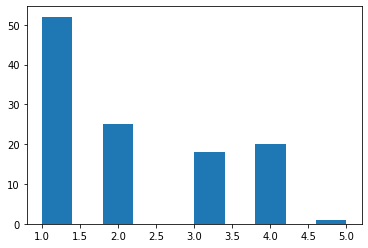

In [14]:
impact = [0] * result.shape[0]
for i in range(result.shape[0]):
    if(result.loc[i, 'impact.overall_rating.Insignificant']):
        impact[i] = 1
    elif(result.loc[i, 'impact.overall_rating.Distracting']):
        impact[i] = 2
    elif(result.loc[i, 'impact.overall_rating.Painful']):
        impact[i] = 3
    elif(result.loc[i, 'impact.overall_rating.Damaging']):
        impact[i] = 4
    elif(result.loc[i, 'impact.overall_rating.Catastrophic']):
        impact[i] = 5
result['action.Impact'] = impact #Impact rating column is named 'action.Impact'
result = result.loc[:, result.columns.str.startswith('action')] #CURRENT FINAL DATAFRAME
result
import matplotlib.pyplot as plt
plt.hist(result["action.Impact"])

In [15]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy.do_why import CausalModel
import dowhy.datasets, dowhy.plotter 

In [16]:
import sys
print(sys.version)

3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [17]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_samples=10000,
        treatment_is_binary=True)
df = data["df"]
df

,Z0,Z1,X0,X1,X2,X3,X4,v,y
0,1.0,0.259561,-1.606434,-0.873476,-0.151505,0.385284,-2.615950,0.0,-8.932793
1,0.0,0.413013,-0.344005,-0.888563,1.098791,0.264518,-1.088865,0.0,-4.258991
2,0.0,0.439458,-0.095889,0.004016,0.078756,0.493939,-0.547103,1.0,10.856276
3,0.0,0.432421,-0.486667,-0.587692,-0.714824,1.419103,-1.933671,0.0,-1.543374
4,0.0,0.395086,0.202678,0.333458,-0.636800,-0.948896,-0.530159,0.0,-0.376954
...,...,...,...,...,...,...,...,...,...
9995,0.0,0.704943,-1.709376,-1.108787,-0.358959,0.103097,-0.601215,0.0,-10.958504
9996,0.0,0.722636,-0.551279,1.034587,0.746468,1.453503,-0.970510,1.0,16.693157
9997,0.0,0.576426,-1.213509,2.594326,-0.223946,0.765467,-0.761273,1.0,19.641421
9998,0.0,0.112843,1.352216,-2.321599,0.666304,1.281475,-1.444613,0.0,-3.017665


In [56]:
#Create causal model with instrumental
model = CausalModel(
    data = result,
    treatment = 'action.Environmental',
    outcome = 'action.Impact',
    #graph = './InstrumentalVariables/InstrumentalTest.gml',
    graph = './NetworkXTest/test.gml',
    common_causes = ['action.Error', 'action.Misuse', 'action.Physical', 'action.Social'],
    #instruments = ['action.Hacking', 'action.Malware'],
    logging_level = logging.INFO
)
#model.view_model(layout="dot")

INFO:dowhy.do_why:Model to find the causal effect of treatment ['action.Environmental'] on outcome ['action.Impact']


In [57]:
model.view_model()

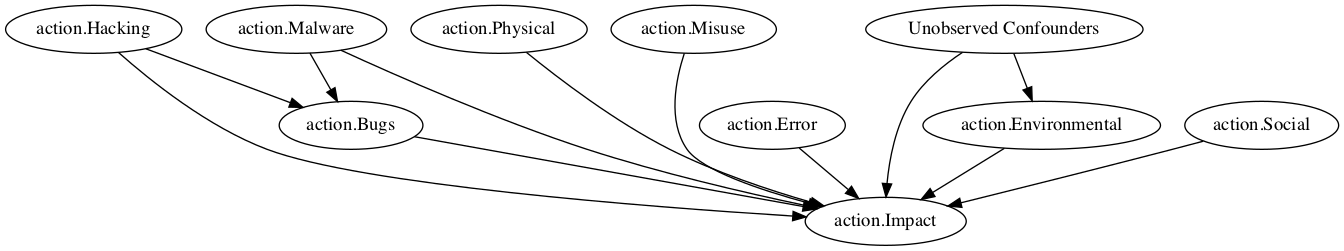

In [58]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We get a causal graph. Now identification and estimation is done. 

In [59]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']


WARN: Do you want to continue by ignoring these unobserved confounders? [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                      
─────────────────────(Expectation(action.Impact))
daction.Environmental                            
Estimand assumption 1, Unconfoundedness: If U→action.Environmental and U→action.Impact then P(action.Impact|action.Environmental,,U) = P(action.Impact|action.Environmental,)
### Estimand : 2
Estimand name: iv
No such variable found!



INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: action.Impact~action.Environmental


Causal Estimate is 0.0


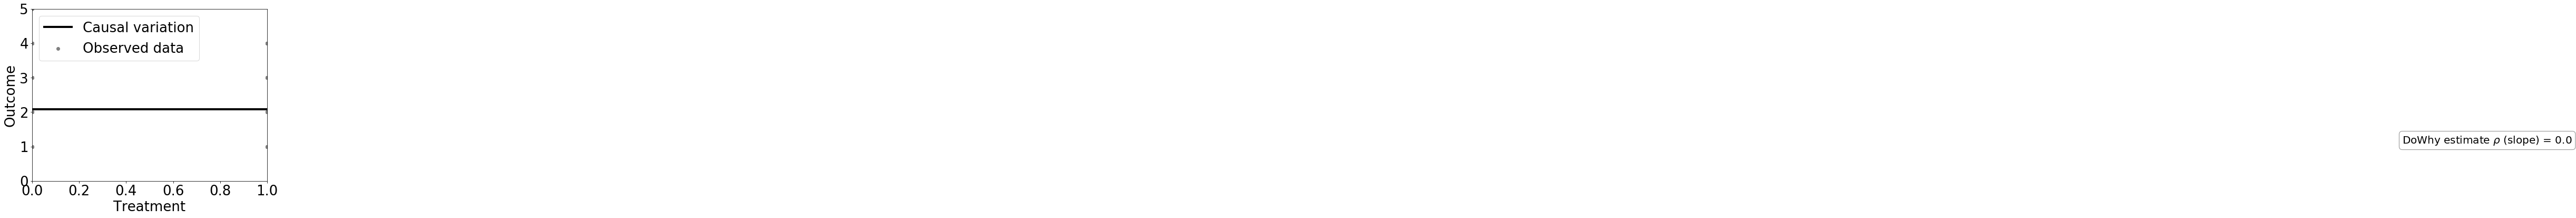

In [60]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, result['action.Bugs'], result['action.Impact'])
# I think the issue is our data isn't giving us a linear plot... this is linear regression after all

In [61]:
print("DoWhy estimate is " + str(estimate.value))
rvar = 1 if np.random.uniform() >0.5 else 0
print ("Actual true causal effect was {0}".format(rvar))

DoWhy estimate is 0.0
Actual true causal effect was 0


In [62]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
          d                                      
─────────────────────(Expectation(action.Impact))
daction.Environmental                            
Estimand assumption 1, Unconfoundedness: If U→action.Environmental and U→action.Impact then P(action.Impact|action.Environmental,,U) = P(action.Impact|action.Environmental,)
### Estimand : 2
Estimand name: iv
No such variable found!



## Method 1: Stratification

In [63]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

ERROR:dowhy.causal_estimator:No common causes/confounders present. Propensity score based methods are not applicable


Exception: No common causes/confounders present. Propensity score based methods are not applicable

## Method 2: Matching

In [64]:
causal_estimate_match = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))

ERROR:dowhy.causal_estimator:No common causes/confounders present. Propensity score based methods are not applicable


Exception: No common causes/confounders present. Propensity score based methods are not applicable